In [46]:
from src import kernel

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
def f(x):
    return -x+x**3

def Sim(x,a,b):
    return b+a*x

In [102]:
x = np.linspace(-2,2,50)
y_obs = pd.DataFrame(f(x),columns=['y'])
theta = np.random.multivariate_normal([0,0],[[1,0],[0,1]],100)
y_sim = pd.DataFrame()
for a,b in theta:
    y_sim = pd.concat([y_sim,pd.DataFrame(np.c_[Sim(x,a,b),[a]*50,[b]*50], columns=['y','a','b'])])

In [110]:
Dataset = kernel.utils.ABCDataSet(observed_samples=y_obs, prior_samples=y_sim, parameter_keys=['a','b'], data_key=['y'])

In [115]:
bw_para = kernel.utils.functions.band_width(Dataset.parameters,method='scott')
bw_y = kernel.utils.functions.band_width(Dataset.prior_data, method='scott')

In [117]:
ABC = kernel.ABC(Dataset=Dataset,cov_para=bw_para(),cov_y=bw_y())

In [130]:
y_post = Sim(x,**ABC.posterior_mean().loc['mean'])

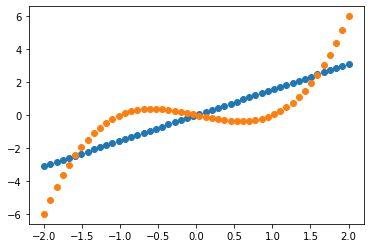

In [133]:
plt.plot(x,y_post,'o')
plt.plot(x,y_obs,'o')

オレンジの点群y_obsが複数観測された場合のposteriorはどう計算する?
今までは、1発だけwを計算していたが、例えば、オレンジの点群y_obs1とy_obs2が観測された場合の更新則は,    
重み付きwのkernel mean サンプルを使って

p(y|x=x_1)の計算